In [ ]:
# !pip install colormaps gdown
import numpy as np 
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns
import colormaps

In [ ]:
# Constants
Lv = 2500840.0 # Latent heat of vaporization in J/kg
cpd = 1004.666218 # specific heat capacity for dry air in J/K/kg

Read in the data and create time series averaged within 10°W to 10°E and 7°N to 17°N. In this case only OLR and precipitation are needed. Multiply the precipitation by the latent heat of vaporization (above) to get $L_vP$, the energy flux form of precipitation. The additional variables for ERA5 are already area-averaged time series.

In [ ]:
# Observations
# !gdown {'1LP_poS2Sc1bFlctqHIRh9j8h5vAK2gBH'}
# !gdown {'1yBWSyR6p7b5mbFyYaw0Y5-iXTRhFxU0B'}

# Reanalysis precipitation and OLR
# !gdown {'1RnNiv4iTdQDOZYz6RCa8YznbWpW5vrwa'}
# !gdown {'1X4iEDqSARpF8mWxrt8r2Zb1wk1qVgq7n'}
# !gdown {'1ailuu8awjReWTzithgdo38T0hTeZRW34'}
# !gdown {'1ARbfGEGGnexMUUyRD1IqbneM6aaQQNFL'}

# Reanalysis extras
# !gdown {'17Ty_1I6wYVPGarrwbWL9lBhq3U3GET1h'}

In [ ]:
obs = {}
# precipitation and OLR
# area averages (don't forget the weighting)

In [ ]:
era5 = {}
# ERA5 precipitation and OLR
# area averages

# remaining variables are already area-averaged for 10°W-10°E, 7°N-17°N
ncf = xr.open_dataset('ecmwf-era5_all.1d.2001-2020.wam_ts.nc')
era5['Qsw'] = (ncf['rst'] - ncf['rss']).squeeze()
era5['LWs'] = -1*ncf['rls'].squeeze()
era5['vit'] = 1004.6*ncf['VIT'].squeeze() 
era5['dvit'] = era5['vit'].differentiate('time', datetime_unit='s')
era5['shf'] = -1*ncf['hfss'].squeeze()
era5['vigd'] = ncf['VIGD'].squeeze()
era5['vithed'] = ncf['VITHED'].squeeze()

In [ ]:
jra3q = {}
# JRA-3Q precipitation and OLR
# area averages

Compute the mean annual cycles for these time series by day of year, using a 10-day rolling mean.

In [ ]:
# mean annual cycles

Plot the mean annual cycles of outgoing longwave radiation from CERES, ERA5, and JRA-3Q (see example below). Do these three datasets agree? How large are the biases? How would you describe the differences?

In [ ]:
# mean annual cycles of OLR

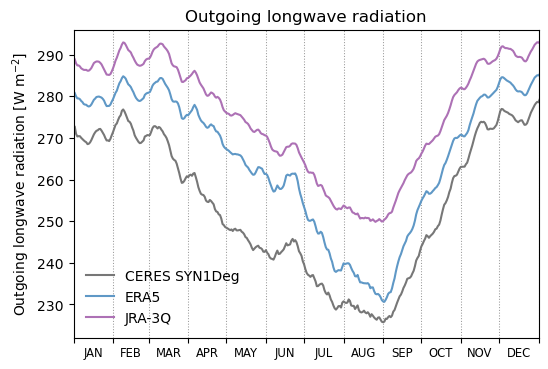

Plot the mean annual cycles of the difference $L_vP$ - OLR for the three datasets. When are the values most different? Do you think this has any implications for using this difference to identify the timing of wet season onset?

In [ ]:
# Mean annual cycles of LvP - OLR

Plot the mean annual cycles of other terms (surface sensible heat flux, net upward surface longwave radiation flux, solar heating of the atmospheric column, and the change in vertically-integrated air temperature) in the ERA5 energy budget, along with their sum. How much do these terms change over the year? In the simplest form of the energy budget, we would assume that the sum of these terms is roughly constant. Is this assumption justified for this region?

In [ ]:
# Mean annual cycles of other energy budget terms

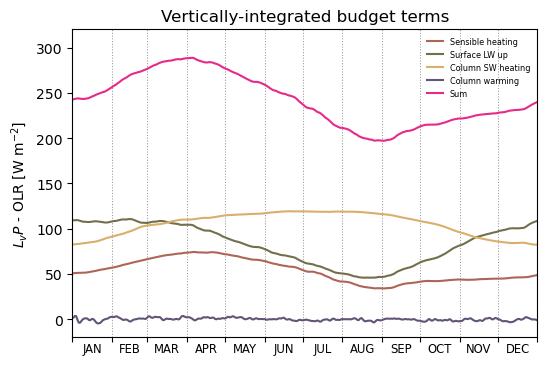

Plot the mean annual cycles of dry static energy flux divergence (vigd + vithed; vertically-integrated geopotential divergence + vertically-integrated thermal energy divergence) along with the difference $L_vP$ - OLR for ERA5. Do you think that the evolution of $L_vP$ - OLR can serve as an observable measure of changes in dry static energy flux divergence?

Compute the annual averages of both the sum of all four terms and the sum of the two radiative terms (net upward surface longwave radiation flux and solar heating of the atmospheric column; see below). Try adding each of these (not both) to $L_vP$ - OLR. To identify onset timing, we will need to estimate an appropriate threshold to correspond to the initiation of large-scale monsoon overturning. Could we use one of these quantities to define that threshold? Why or why not?

In [ ]:
bghtg = (era5['LWs_ac'] + era5['Qsw_ac'] + era5['shf_ac'])
rdhtg = (era5['LWs_ac'] + era5['Qsw_ac'])

Try applying the same offset to the $L_vP$ - OLR metrics from observations and JRA-3Q and plot them in the same axis (see example below). Can you identify a single threshold (or type of threshold, such as a percentile) that would be suitable for all three datasets, or do you think we will need a separate correction for each dataset? 

In [ ]:
# Plot mean annual cycles for all three datasets together with ERA5 dry static energy flux divergence

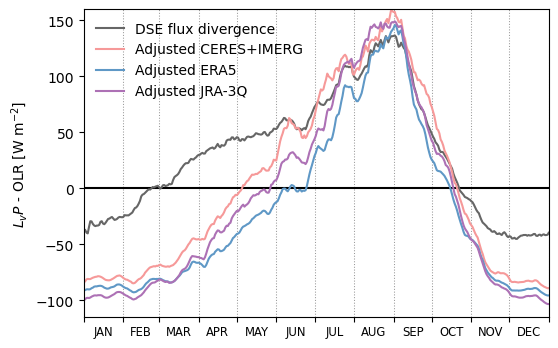

Try plotting different quantiles of L<sub>v</sub>P - OLR (see below for the median). Could one of these provide a suitable threshold for onset?

In [ ]:
#obsq = obs_cyc.quantile(0.5)
# Plot annual cycles with potential quantile thresholds

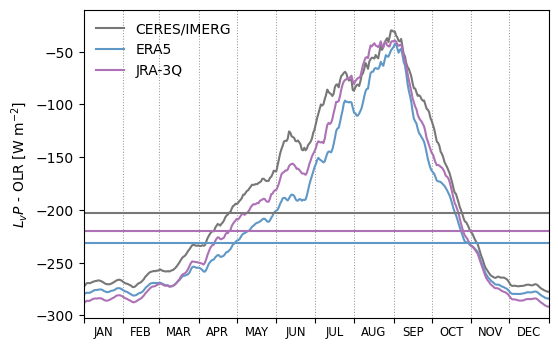

Based on these results, we may try the 70th percentile of $L_vP$ - OLR as the onset threshold. This guess is based on the fraction of the seasonal cycle for which $L_vP$ - OLR plus the annual-mean radiative components is positive in ERA5. This selection assumes that sensible heating primarily heats the boundary layer, below part of the column where clouds form. 

To test this further, we should compare this estimate with the fractions based on JRA-3Q and (because we have neglected the time-mean sensible heat flux) the CERES/IMERG estimate. CERES SYN1Deg provides estimates of radiative fluxes at the surface in addition to those observed at the nominal top-of-atmosphere.